# 結果可視化

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import scipy.signal as signal
import scipy.stats as stats
import seaborn as sns


In [8]:
file_path = 'result/af_test_250704.pkl'
result_df = pd.read_pickle(file_path)

# 箱ひげ図

## 標準偏差

描画用データの整理中...
データ整理後のサンプル数: 1977
tachy_flag=0のサンプル数: 1819
tachy_flag=1のサンプル数: 158

tachy_flagの分布:
AF=0: tachy_flag=0: 189, tachy_flag=1: 45
AF=1: tachy_flag=0: 507, tachy_flag=1: 29
AF=2: tachy_flag=0: 1123, tachy_flag=1: 84

AFラベルの種類: [0 1 2]
AFラベルの数: 3

箱ひげ図データ範囲の確認（tachy_flagに応じて選択された値）
AF Label        サンプル数      最小値        Q1         Q3         最大値        IQR       
--------------------------------------------------------------------------------
0               234        0.003      0.055      0.238      0.571      0.184     
1               536        0.078      0.218      0.302      0.659      0.084     
2               1207       0.019      0.207      0.298      0.661      0.092     


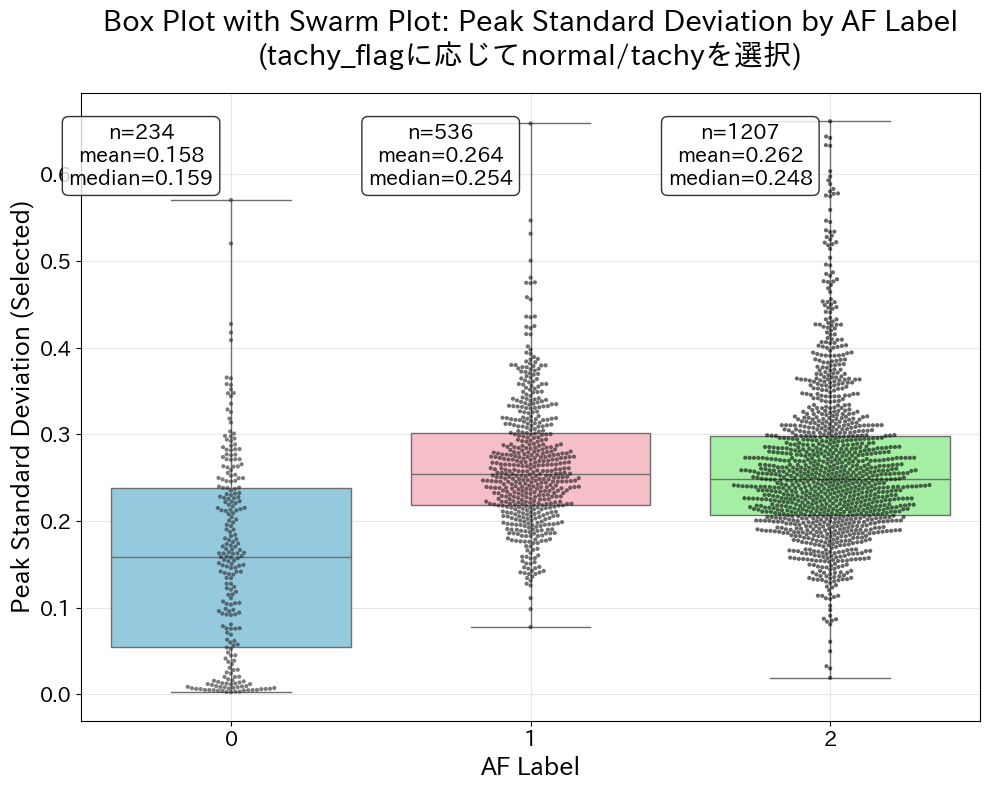


統計的検定結果（ラベル0との比較）
比較対象            t統計量         p値           有意差       
--------------------------------------------------
1               -13.2415     0.0000       あり        
2               -13.3358     0.0000       あり        

ノンパラメトリック検定（Mann-Whitney U検定）
--------------------------------------------------
比較対象            U統計量         p値           有意差       
--------------------------------------------------
1               27522.5000   0.0000       あり        
2               67184.0000   0.0000       あり        

基本統計量（tachy_flagに応じて選択された値）
AF Label        サンプル数      平均値        中央値        標準偏差       最小値        最大値       
--------------------------------------------------------------------------------
0               234        0.158      0.159      0.113      0.003      0.571     
1               536        0.264      0.254      0.071      0.078      0.659     
2               1207       0.262      0.248      0.087      0.019      0.661     


In [ ]:
# 描画用データの整理
print("描画用データの整理中...")

# 新しい列を作成して、tachy_flagに応じて適切な値を選択
def select_peak_std(row):
    """tachy_flagに応じて適切なpeak_std値を選択する関数"""
    if row['tachy_flag'] == 1:
        return row['peak_std_tachy']
    else:
        return row['peak_std_normal']

# 新しい列を作成
result_df['peak_std_selected'] = result_df.apply(select_peak_std, axis=1)

# データの確認
print(f"データ整理後のサンプル数: {len(result_df)}")
print(f"tachy_flag=0のサンプル数: {len(result_df[result_df['tachy_flag'] == 0])}")
print(f"tachy_flag=1のサンプル数: {len(result_df[result_df['tachy_flag'] == 1])}")

# 各AFラベルでのtachy_flagの分布を確認
print("\ntachy_flagの分布:")
for label in result_df['AF'].unique():
    label_data = result_df[result_df['AF'] == label]
    tachy_0_count = len(label_data[label_data['tachy_flag'] == 0])
    tachy_1_count = len(label_data[label_data['tachy_flag'] == 1])
    print(f"AF={label}: tachy_flag=0: {tachy_0_count}, tachy_flag=1: {tachy_1_count}")

# オブジェクト指向インターフェースでseabornを使用した箱ひげ図の作成
fig, ax = plt.subplots(figsize=(10, 8))

# AFラベルの数を確認
af_labels = result_df['AF'].unique()
print(f"\nAFラベルの種類: {af_labels}")
print(f"AFラベルの数: {len(af_labels)}")

# AFラベルの数に応じて色を設定
if len(af_labels) == 2:
    bright_colors = ['#87CEEB', '#FFB6C1']  # 明るいスカイブルーとピンク
elif len(af_labels) == 3:
    bright_colors = ['#87CEEB', '#FFB6C1', '#98FB98']  # 明るいスカイブルー、ピンク、パレグリーン
else:
    # より多くの色が必要な場合
    bright_colors = ['#87CEEB', '#FFB6C1', '#98FB98', '#DDA0DD', '#F0E68C']

# 各グループのデータ範囲を確認（表形式で出力）
print("\n" + "="*80)
print("箱ひげ図データ範囲の確認（tachy_flagに応じて選択された値）")
print("="*80)

# ヘッダーを表示
print(f"{'AF Label':<15} {'サンプル数':<10} {'最小値':<10} {'Q1':<10} {'Q3':<10} {'最大値':<10} {'IQR':<10}")
print("-"*80)

# 各ラベルの情報を表示
for label in af_labels:
    data = result_df[result_df['AF'] == label]['peak_std_selected'].dropna()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    min_val = data.min()
    max_val = data.max()
    
    print(f"{label:<15} {len(data):<10} {min_val:<10.3f} {q1:<10.3f} {q3:<10.3f} {max_val:<10.3f} {iqr:<10.3f}")

print("="*80)

# seabornのboxplotを使用（ヒゲの範囲を調整）
sns.boxplot(data=result_df, x='AF', y='peak_std_selected', hue='AF', 
            legend=False, ax=ax, palette=bright_colors[:len(af_labels)],
            whis=float('inf'))  # ヒゲを最小値・最大値まで伸ばす

# swarmplotを追加して全データを表示（警告を解決）
sns.swarmplot(data=result_df, x='AF', y='peak_std_selected', hue='AF',
              legend=False, ax=ax, palette='dark:black', alpha=0.6, size=3)

# グラフの設定（フォントサイズを1.5倍に拡大）
ax.set_xlabel('AF Label', fontsize=18)  # 12 * 1.5 = 18
ax.set_ylabel('Peak Standard Deviation (Selected)', fontsize=18)  # 12 * 1.5 = 18
ax.set_title('Peak Standard Deviation by AF Label\n(tachy_flagに応じてnormal/tachyを選択)', fontsize=21, pad=20)  # 14 * 1.5 = 21
ax.grid(True, alpha=0.3)

# tickerのフォントサイズを設定
ax.tick_params(axis='both', which='major', labelsize=15)  # デフォルト10 * 1.5 = 15

# 統計情報の表示（位置を左にずらして重なりを回避）
for i, label in enumerate(af_labels):
    data = result_df[result_df['AF'] == label]['peak_std_selected'].dropna()
    if len(data) > 0:
        mean_val = data.mean()
        median_val = data.median()
        # 統計情報をグラフの上部に配置（位置を左にずらす）
        ax.text(i - 0.3, ax.get_ylim()[1] * 0.95, 
                f'n={len(data)}\nmean={mean_val:.3f}\nmedian={median_val:.3f}', 
                ha='center', va='top', fontsize=15,  # 10 * 1.5 = 15
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

# 統計的検定（ラベル0に対する比較）
print(f"\n" + "="*80)
print("統計的検定結果（ラベル0との比較）")
print("="*80)

# ラベル0のデータを取得
label_0_data = result_df[result_df['AF'] == af_labels[0]]['peak_std_selected'].dropna()

if len(label_0_data) > 0:
    # ヘッダーを表示
    print(f"{'比較対象':<15} {'t統計量':<12} {'p値':<12} {'有意差':<10}")
    print("-"*50)
    
    # 各ラベルとラベル0を比較
    for label in af_labels[1:]:  # ラベル0以外をループ
        other_data = result_df[result_df['AF'] == label]['peak_std_selected'].dropna()
        
        if len(other_data) > 0:
            # t検定を実行
            t_stat, p_val = stats.ttest_ind(label_0_data, other_data, equal_var=False)
            
            # 有意差の判定
            significance = 'あり' if p_val < 0.05 else 'なし'
            
            print(f"{label:<15} {t_stat:<12.4f} {p_val:<12.4f} {significance:<10}")
    
    print("="*50)
    
    # Mann-Whitney U検定も実行（ノンパラメトリック）
    print(f"\nノンパラメトリック検定（Mann-Whitney U検定）")
    print("-"*50)
    print(f"{'比較対象':<15} {'U統計量':<12} {'p値':<12} {'有意差':<10}")
    print("-"*50)
    
    for label in af_labels[1:]:  # ラベル0以外をループ
        other_data = result_df[result_df['AF'] == label]['peak_std_selected'].dropna()
        
        if len(other_data) > 0:
            # Mann-Whitney U検定を実行
            u_stat, p_val = stats.mannwhitneyu(label_0_data, other_data, alternative='two-sided')
            
            # 有意差の判定
            significance = 'あり' if p_val < 0.05 else 'なし'
            
            print(f"{label:<15} {u_stat:<12.4f} {p_val:<12.4f} {significance:<10}")
    
    print("="*50)

# 基本統計量の表示（表形式）
print(f"\n" + "="*80)
print("基本統計量（tachy_flagに応じて選択された値）")
print("="*80)

# ヘッダーを表示
print(f"{'AF Label':<15} {'サンプル数':<10} {'平均値':<10} {'中央値':<10} {'標準偏差':<10} {'最小値':<10} {'最大値':<10}")
print("-"*80)

# 各ラベルの統計量を表示
for label in af_labels:
    data = result_df[result_df['AF'] == label]['peak_std_selected'].dropna()
    print(f"{label:<15} {len(data):<10} {data.mean():<10.3f} {data.median():<10.3f} {data.std():<10.3f} {data.min():<10.3f} {data.max():<10.3f}")

print("="*80)

## MAD

データ整理後のサンプル数: 1977
tachy_flag=0のサンプル数: 1819
tachy_flag=1のサンプル数: 158

tachy_flagの分布:
AF=0: tachy_flag=0: 189, tachy_flag=1: 45
AF=1: tachy_flag=0: 507, tachy_flag=1: 29
AF=2: tachy_flag=0: 1123, tachy_flag=1: 84

AFラベルの種類: [0 1 2]
AFラベルの数: 3

箱ひげ図データ範囲の確認（tachy_flagに応じて選択された値）
AF Label        サンプル数      最小値        Q1         Q3         最大値        IQR       
--------------------------------------------------------------------------------
0               234        0.002      0.030      0.191      0.446      0.161     
1               536        0.045      0.172      0.239      0.521      0.067     
2               1207       0.016      0.159      0.238      0.577      0.079     


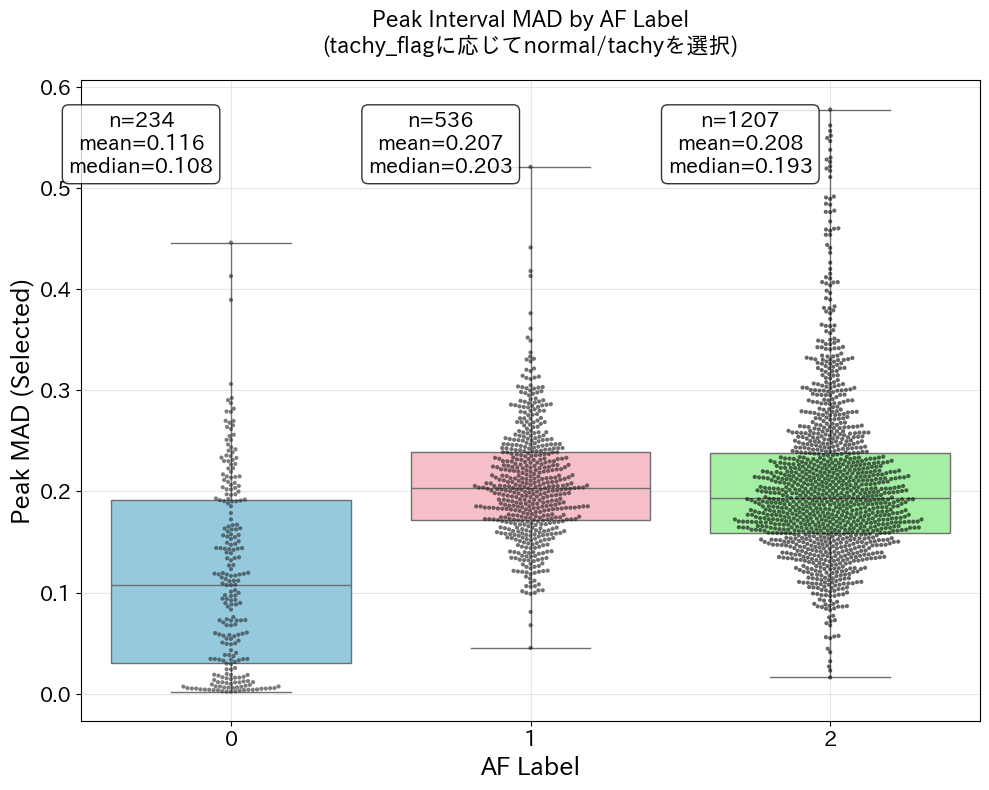


統計的検定結果（ラベル0との比較）
比較対象            t統計量         p値           有意差       
--------------------------------------------------
1               -14.0020     0.0000       あり        
2               -14.1885     0.0000       あり        

ノンパラメトリック検定（Mann-Whitney U検定）
--------------------------------------------------
比較対象            U統計量         p値           有意差       
--------------------------------------------------
1               26436.0000   0.0000       あり        
2               65163.0000   0.0000       あり        

基本統計量（tachy_flagに応じて選択された値）
AF Label        サンプル数      平均値        中央値        標準偏差       最小値        最大値       
--------------------------------------------------------------------------------
0               234        0.116      0.108      0.093      0.002      0.446     
1               536        0.207      0.203      0.056      0.045      0.521     
2               1207       0.208      0.193      0.080      0.016      0.577     


In [29]:
# 新しい列を作成して、tachy_flagに応じて適切な値を選択
def select_peak_mad(row):
    """tachy_flagに応じて適切なpeak_mad値を選択する関数"""
    if row['tachy_flag'] == 1:
        return row['peak_mad_tachy']
    else:
        return row['peak_mad_normal']

# 新しい列を作成
result_df['peak_mad_selected'] = result_df.apply(select_peak_mad, axis=1)

# データの確認
print(f"データ整理後のサンプル数: {len(result_df)}")
print(f"tachy_flag=0のサンプル数: {len(result_df[result_df['tachy_flag'] == 0])}")
print(f"tachy_flag=1のサンプル数: {len(result_df[result_df['tachy_flag'] == 1])}")

# 各AFラベルでのtachy_flagの分布を確認
print("\ntachy_flagの分布:")
for label in result_df['AF'].unique():
    label_data = result_df[result_df['AF'] == label]
    tachy_0_count = len(label_data[label_data['tachy_flag'] == 0])
    tachy_1_count = len(label_data[label_data['tachy_flag'] == 1])
    print(f"AF={label}: tachy_flag=0: {tachy_0_count}, tachy_flag=1: {tachy_1_count}")

# オブジェクト指向インターフェースでseabornを使用した箱ひげ図の作成
fig, ax = plt.subplots(figsize=(10, 8))

# AFラベルの数を確認
af_labels = result_df['AF'].unique()
print(f"\nAFラベルの種類: {af_labels}")
print(f"AFラベルの数: {len(af_labels)}")

# AFラベルの数に応じて色を設定
if len(af_labels) == 2:
    bright_colors = ['#87CEEB', '#FFB6C1']  # 明るいスカイブルーとピンク
elif len(af_labels) == 3:
    bright_colors = ['#87CEEB', '#FFB6C1', '#98FB98']  # 明るいスカイブルー、ピンク、パレグリーン
else:
    # より多くの色が必要な場合
    bright_colors = ['#87CEEB', '#FFB6C1', '#98FB98', '#DDA0DD', '#F0E68C']

# 各グループのデータ範囲を確認（表形式で出力）
print("\n" + "="*80)
print("箱ひげ図データ範囲の確認（tachy_flagに応じて選択された値）")
print("="*80)

# ヘッダーを表示
print(f"{'AF Label':<15} {'サンプル数':<10} {'最小値':<10} {'Q1':<10} {'Q3':<10} {'最大値':<10} {'IQR':<10}")
print("-"*80)

# 各ラベルの情報を表示
for label in af_labels:
    data = result_df[result_df['AF'] == label]['peak_mad_selected'].dropna()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    min_val = data.min()
    max_val = data.max()
    
    print(f"{label:<15} {len(data):<10} {min_val:<10.3f} {q1:<10.3f} {q3:<10.3f} {max_val:<10.3f} {iqr:<10.3f}")

print("="*80)

# seabornのboxplotを使用（ヒゲの範囲を調整）
sns.boxplot(data=result_df, x='AF', y='peak_mad_selected', hue='AF', 
            legend=False, ax=ax, palette=bright_colors[:len(af_labels)],
            whis=float('inf'))  # ヒゲを最小値・最大値まで伸ばす

# swarmplotを追加して全データを表示（警告を解決）
sns.swarmplot(data=result_df, x='AF', y='peak_mad_selected', hue='AF',
              legend=False, ax=ax, palette='dark:black', alpha=0.6, size=3)

# グラフの設定（フォントサイズを1.5倍に拡大）
ax.set_xlabel('AF Label', fontsize=18)  # 12 * 1.5 = 18
ax.set_ylabel('Peak MAD (Selected)', fontsize=18)  # 12 * 1.5 = 18
ax.set_title('Peak Interval MAD by AF Label\n(tachy_flagに応じてnormal/tachyを選択)', fontsize=16, pad=20)
ax.grid(True, alpha=0.3)

# tickerのフォントサイズを設定
ax.tick_params(axis='both', which='major', labelsize=15)  # デフォルト10 * 1.5 = 15

# 統計情報の表示（位置を左にずらして重なりを回避）
for i, label in enumerate(af_labels):
    data = result_df[result_df['AF'] == label]['peak_mad_selected'].dropna()
    if len(data) > 0:
        mean_val = data.mean()
        median_val = data.median()
        # 統計情報をグラフの上部に配置（位置を左にずらす）
        ax.text(i - 0.3, ax.get_ylim()[1] * 0.95, 
                f'n={len(data)}\nmean={mean_val:.3f}\nmedian={median_val:.3f}', 
                ha='center', va='top', fontsize=15,  # 10 * 1.5 = 15
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

# 統計的検定（ラベル0に対する比較）
print(f"\n" + "="*80)
print("統計的検定結果（ラベル0との比較）")
print("="*80)

# ラベル0のデータを取得
label_0_data = result_df[result_df['AF'] == af_labels[0]]['peak_mad_selected'].dropna()

if len(label_0_data) > 0:
    # ヘッダーを表示
    print(f"{'比較対象':<15} {'t統計量':<12} {'p値':<12} {'有意差':<10}")
    print("-"*50)
    
    # 各ラベルとラベル0を比較
    for label in af_labels[1:]:  # ラベル0以外をループ
        other_data = result_df[result_df['AF'] == label]['peak_mad_selected'].dropna()
        
        if len(other_data) > 0:
            # t検定を実行
            t_stat, p_val = stats.ttest_ind(label_0_data, other_data, equal_var=False)
            
            # 有意差の判定
            significance = 'あり' if p_val < 0.05 else 'なし'
            
            print(f"{label:<15} {t_stat:<12.4f} {p_val:<12.4f} {significance:<10}")
    
    print("="*50)
    
    # Mann-Whitney U検定も実行（ノンパラメトリック）
    print(f"\nノンパラメトリック検定（Mann-Whitney U検定）")
    print("-"*50)
    print(f"{'比較対象':<15} {'U統計量':<12} {'p値':<12} {'有意差':<10}")
    print("-"*50)
    
    for label in af_labels[1:]:  # ラベル0以外をループ
        other_data = result_df[result_df['AF'] == label]['peak_mad_selected'].dropna()
        
        if len(other_data) > 0:
            # Mann-Whitney U検定を実行
            u_stat, p_val = stats.mannwhitneyu(label_0_data, other_data, alternative='two-sided')
            
            # 有意差の判定
            significance = 'あり' if p_val < 0.05 else 'なし'
            
            print(f"{label:<15} {u_stat:<12.4f} {p_val:<12.4f} {significance:<10}")
    
    print("="*50)

# 基本統計量の表示（表形式）
print(f"\n" + "="*80)
print("基本統計量（tachy_flagに応じて選択された値）")
print("="*80)

# ヘッダーを表示
print(f"{'AF Label':<15} {'サンプル数':<10} {'平均値':<10} {'中央値':<10} {'標準偏差':<10} {'最小値':<10} {'最大値':<10}")
print("-"*80)

# 各ラベルの統計量を表示
for label in af_labels:
    data = result_df[result_df['AF'] == label]['peak_mad_selected'].dropna()
    print(f"{label:<15} {len(data):<10} {data.mean():<10.3f} {data.median():<10.3f} {data.std():<10.3f} {data.min():<10.3f} {data.max():<10.3f}")

print("="*80)

## 分散

peak_varデータ整理後のサンプル数: 1977
tachy_flag=0のサンプル数: 1819
tachy_flag=1のサンプル数: 158

tachy_flagの分布:
AF=0: tachy_flag=0: 189, tachy_flag=1: 45
AF=1: tachy_flag=0: 507, tachy_flag=1: 29
AF=2: tachy_flag=0: 1123, tachy_flag=1: 84

AFラベルの種類: [0 1 2]
AFラベルの数: 3

箱ひげ図データ範囲の確認（peak_var: tachy_flagに応じて選択された値）
AF Label        サンプル数      最小値        Q1         Q3         最大値        IQR       
--------------------------------------------------------------------------------
0               234        0.000      0.003      0.057      0.326      0.054     
1               536        0.006      0.048      0.091      0.434      0.043     
2               1207       0.000      0.043      0.089      0.437      0.046     


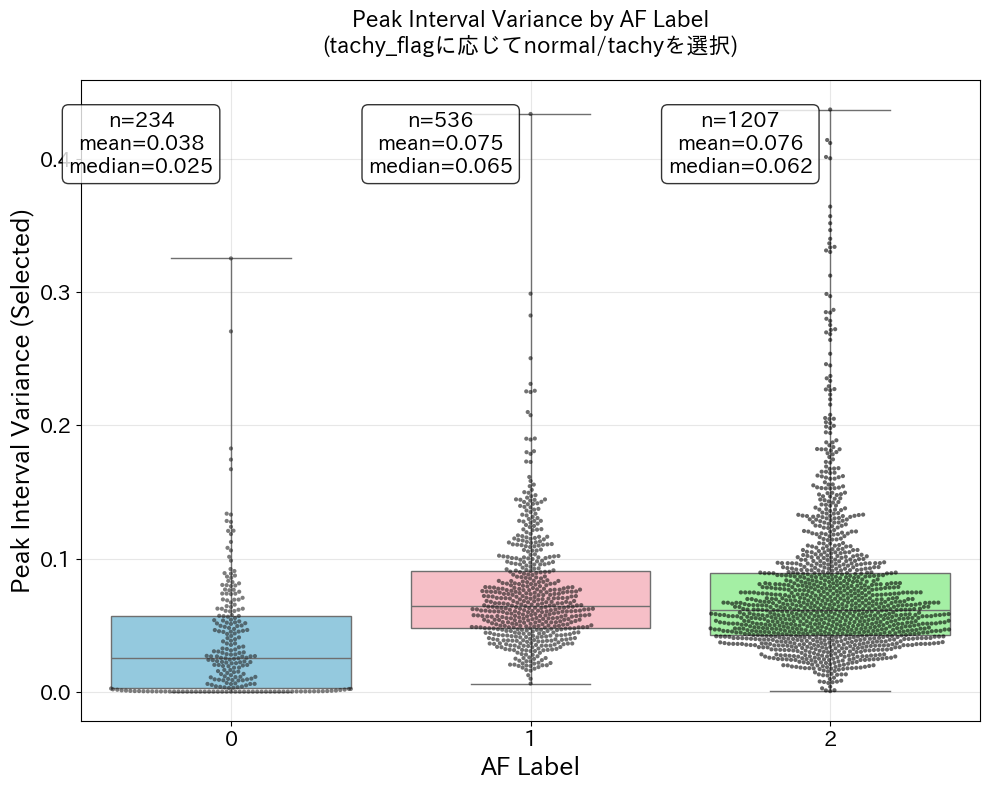


統計的検定結果（peak_var: ラベル0との比較）
比較対象            t統計量         p値           有意差       
--------------------------------------------------
1               -10.7287     0.0000       あり        
2               -11.5897     0.0000       あり        

ノンパラメトリック検定（Mann-Whitney U検定）
--------------------------------------------------
比較対象            U統計量         p値           有意差       
--------------------------------------------------
1               27522.5000   0.0000       あり        
2               67184.0000   0.0000       あり        

基本統計量（peak_var: tachy_flagに応じて選択された値）
AF Label        サンプル数      平均値        中央値        標準偏差       最小値        最大値       
--------------------------------------------------------------------------------
0               234        0.038      0.025      0.044      0.000      0.326     
1               536        0.075      0.065      0.043      0.006      0.434     
2               1207       0.076      0.062      0.057      0.000      0.437     


In [31]:
# peak_varに対して同様の処理を実行

# 新しい列を作成して、tachy_flagに応じて適切な値を選択
def select_peak_var(row):
    """tachy_flagに応じて適切なpeak_var値を選択する関数"""
    if row['tachy_flag'] == 1:
        return row['peak_var_tachy']
    else:
        return row['peak_var_normal']

# 新しい列を作成
result_df['peak_var_selected'] = result_df.apply(select_peak_var, axis=1)

# データの確認
print(f"peak_varデータ整理後のサンプル数: {len(result_df)}")
print(f"tachy_flag=0のサンプル数: {len(result_df[result_df['tachy_flag'] == 0])}")
print(f"tachy_flag=1のサンプル数: {len(result_df[result_df['tachy_flag'] == 1])}")

# 各AFラベルでのtachy_flagの分布を確認
print("\ntachy_flagの分布:")
for label in result_df['AF'].unique():
    label_data = result_df[result_df['AF'] == label]
    tachy_0_count = len(label_data[label_data['tachy_flag'] == 0])
    tachy_1_count = len(label_data[label_data['tachy_flag'] == 1])
    print(f"AF={label}: tachy_flag=0: {tachy_0_count}, tachy_flag=1: {tachy_1_count}")

# オブジェクト指向インターフェースでseabornを使用した箱ひげ図の作成
fig, ax = plt.subplots(figsize=(10, 8))

# AFラベルの数を確認
af_labels = result_df['AF'].unique()
print(f"\nAFラベルの種類: {af_labels}")
print(f"AFラベルの数: {len(af_labels)}")

# AFラベルの数に応じて色を設定
if len(af_labels) == 2:
    bright_colors = ['#87CEEB', '#FFB6C1']  # 明るいスカイブルーとピンク
elif len(af_labels) == 3:
    bright_colors = ['#87CEEB', '#FFB6C1', '#98FB98']  # 明るいスカイブルー、ピンク、パレグリーン
else:
    # より多くの色が必要な場合
    bright_colors = ['#87CEEB', '#FFB6C1', '#98FB98', '#DDA0DD', '#F0E68C']

# 各グループのデータ範囲を確認（表形式で出力）
print("\n" + "="*80)
print("箱ひげ図データ範囲の確認（peak_var: tachy_flagに応じて選択された値）")
print("="*80)

# ヘッダーを表示
print(f"{'AF Label':<15} {'サンプル数':<10} {'最小値':<10} {'Q1':<10} {'Q3':<10} {'最大値':<10} {'IQR':<10}")
print("-"*80)

# 各ラベルの情報を表示
for label in af_labels:
    data = result_df[result_df['AF'] == label]['peak_var_selected'].dropna()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    min_val = data.min()
    max_val = data.max()
    
    print(f"{label:<15} {len(data):<10} {min_val:<10.3f} {q1:<10.3f} {q3:<10.3f} {max_val:<10.3f} {iqr:<10.3f}")

print("="*80)

# seabornのboxplotを使用（ヒゲの範囲を調整）
sns.boxplot(data=result_df, x='AF', y='peak_var_selected', hue='AF', 
            legend=False, ax=ax, palette=bright_colors[:len(af_labels)],
            whis=float('inf'))  # ヒゲを最小値・最大値まで伸ばす

# swarmplotを追加して全データを表示
sns.swarmplot(data=result_df, x='AF', y='peak_var_selected', hue='AF',
              legend=False, ax=ax, palette='dark:black', alpha=0.6, size=3)

# グラフの設定（フォントサイズを1.5倍に拡大）
ax.set_xlabel('AF Label', fontsize=18)
ax.set_ylabel('Peak Interval Variance (Selected)', fontsize=18)
ax.set_title('Peak Interval Variance by AF Label\n(tachy_flagに応じてnormal/tachyを選択)', fontsize=16, pad=20)
ax.grid(True, alpha=0.3)

# tickerのフォントサイズを設定
ax.tick_params(axis='both', which='major', labelsize=15)

# 統計情報の表示（位置を左にずらして重なりを回避）
for i, label in enumerate(af_labels):
    data = result_df[result_df['AF'] == label]['peak_var_selected'].dropna()
    if len(data) > 0:
        mean_val = data.mean()
        median_val = data.median()
        # 統計情報をグラフの上部に配置（位置を左にずらす）
        ax.text(i - 0.3, ax.get_ylim()[1] * 0.95, 
                f'n={len(data)}\nmean={mean_val:.3f}\nmedian={median_val:.3f}', 
                ha='center', va='top', fontsize=15,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

# 統計的検定（ラベル0に対する比較）
print(f"\n" + "="*80)
print("統計的検定結果（peak_var: ラベル0との比較）")
print("="*80)

# ラベル0のデータを取得
label_0_data = result_df[result_df['AF'] == af_labels[0]]['peak_var_selected'].dropna()

if len(label_0_data) > 0:
    # ヘッダーを表示
    print(f"{'比較対象':<15} {'t統計量':<12} {'p値':<12} {'有意差':<10}")
    print("-"*50)
    
    # 各ラベルとラベル0を比較
    for label in af_labels[1:]:  # ラベル0以外をループ
        other_data = result_df[result_df['AF'] == label]['peak_var_selected'].dropna()
        
        if len(other_data) > 0:
            # t検定を実行
            t_stat, p_val = stats.ttest_ind(label_0_data, other_data, equal_var=False)
            
            # 有意差の判定
            significance = 'あり' if p_val < 0.05 else 'なし'
            
            print(f"{label:<15} {t_stat:<12.4f} {p_val:<12.4f} {significance:<10}")
    
    print("="*50)
    
    # Mann-Whitney U検定も実行（ノンパラメトリック）
    print(f"\nノンパラメトリック検定（Mann-Whitney U検定）")
    print("-"*50)
    print(f"{'比較対象':<15} {'U統計量':<12} {'p値':<12} {'有意差':<10}")
    print("-"*50)
    
    for label in af_labels[1:]:  # ラベル0以外をループ
        other_data = result_df[result_df['AF'] == label]['peak_var_selected'].dropna()
        
        if len(other_data) > 0:
            # Mann-Whitney U検定を実行
            u_stat, p_val = stats.mannwhitneyu(label_0_data, other_data, alternative='two-sided')
            
            # 有意差の判定
            significance = 'あり' if p_val < 0.05 else 'なし'
            
            print(f"{label:<15} {u_stat:<12.4f} {p_val:<12.4f} {significance:<10}")
    
    print("="*50)

# 基本統計量の表示（表形式）
print(f"\n" + "="*80)
print("基本統計量（peak_var: tachy_flagに応じて選択された値）")
print("="*80)

# ヘッダーを表示
print(f"{'AF Label':<15} {'サンプル数':<10} {'平均値':<10} {'中央値':<10} {'標準偏差':<10} {'最小値':<10} {'最大値':<10}")
print("-"*80)

# 各ラベルの統計量を表示
for label in af_labels:
    data = result_df[result_df['AF'] == label]['peak_var_selected'].dropna()
    print(f"{label:<15} {len(data):<10} {data.mean():<10.3f} {data.median():<10.3f} {data.std():<10.3f} {data.min():<10.3f} {data.max():<10.3f}")

print("="*80)

## RMSSD

peak_rmssdデータ整理後のサンプル数: 1977
tachy_flag=0のサンプル数: 1819
tachy_flag=1のサンプル数: 158

tachy_flagの分布:
AF=0: tachy_flag=0: 189, tachy_flag=1: 45
AF=1: tachy_flag=0: 507, tachy_flag=1: 29
AF=2: tachy_flag=0: 1123, tachy_flag=1: 84

AFラベルの種類: [0 1 2]
AFラベルの数: 3

箱ひげ図データ範囲の確認（peak_rmssd: tachy_flagに応じて選択された値）
AF Label        サンプル数      最小値        Q1         Q3         最大値        IQR       
--------------------------------------------------------------------------------
0               234        0.321      0.597      0.833      1.087      0.236     
1               536        0.412      0.724      0.850      1.154      0.126     
2               1207       0.367      0.717      0.857      1.499      0.140     


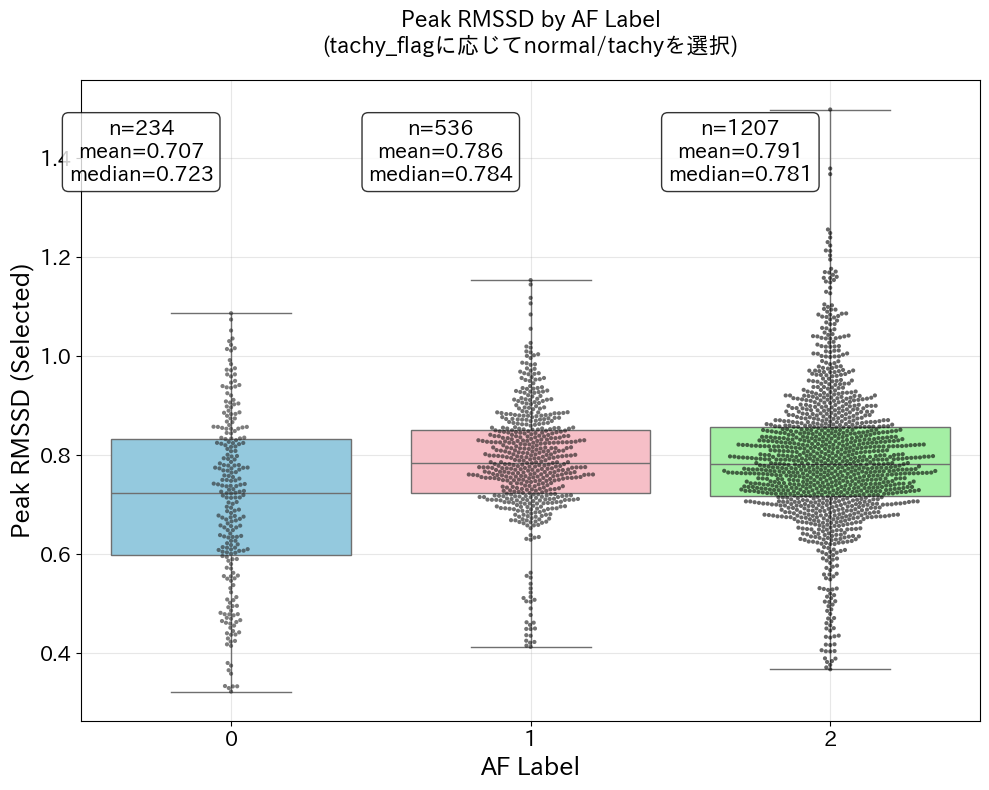


統計的検定結果（peak_rmssd: ラベル0との比較）
比較対象            t統計量         p値           有意差       
--------------------------------------------------
1               -6.4687      0.0000       あり        
2               -7.0413      0.0000       あり        

ノンパラメトリック検定（Mann-Whitney U検定）
--------------------------------------------------
比較対象            U統計量         p値           有意差       
--------------------------------------------------
1               45108.5000   0.0000       あり        
2               102934.0000  0.0000       あり        

基本統計量（peak_rmssd: tachy_flagに応じて選択された値）
AF Label        サンプル数      平均値        中央値        標準偏差       最小値        最大値       
--------------------------------------------------------------------------------
0               234        0.707      0.723      0.173      0.321      1.087     
1               536        0.786      0.784      0.111      0.412      1.154     
2               1207       0.791      0.781      0.135      0.367      1.499     


In [32]:
# peak_rmssdに対して同様の処理を実行

# 新しい列を作成して、tachy_flagに応じて適切な値を選択
def select_peak_rmssd(row):
    """tachy_flagに応じて適切なpeak_rmssd値を選択する関数"""
    if row['tachy_flag'] == 1:
        return row['peak_rmssd_tachy']
    else:
        return row['peak_rmssd_normal']

# 新しい列を作成
result_df['peak_rmssd_selected'] = result_df.apply(select_peak_rmssd, axis=1)

# データの確認
print(f"peak_rmssdデータ整理後のサンプル数: {len(result_df)}")
print(f"tachy_flag=0のサンプル数: {len(result_df[result_df['tachy_flag'] == 0])}")
print(f"tachy_flag=1のサンプル数: {len(result_df[result_df['tachy_flag'] == 1])}")

# 各AFラベルでのtachy_flagの分布を確認
print("\ntachy_flagの分布:")
for label in result_df['AF'].unique():
    label_data = result_df[result_df['AF'] == label]
    tachy_0_count = len(label_data[label_data['tachy_flag'] == 0])
    tachy_1_count = len(label_data[label_data['tachy_flag'] == 1])
    print(f"AF={label}: tachy_flag=0: {tachy_0_count}, tachy_flag=1: {tachy_1_count}")

# オブジェクト指向インターフェースでseabornを使用した箱ひげ図の作成
fig, ax = plt.subplots(figsize=(10, 8))

# AFラベルの数を確認
af_labels = result_df['AF'].unique()
print(f"\nAFラベルの種類: {af_labels}")
print(f"AFラベルの数: {len(af_labels)}")

# AFラベルの数に応じて色を設定
if len(af_labels) == 2:
    bright_colors = ['#87CEEB', '#FFB6C1']  # 明るいスカイブルーとピンク
elif len(af_labels) == 3:
    bright_colors = ['#87CEEB', '#FFB6C1', '#98FB98']  # 明るいスカイブルー、ピンク、パレグリーン
else:
    # より多くの色が必要な場合
    bright_colors = ['#87CEEB', '#FFB6C1', '#98FB98', '#DDA0DD', '#F0E68C']

# 各グループのデータ範囲を確認（表形式で出力）
print("\n" + "="*80)
print("箱ひげ図データ範囲の確認（peak_rmssd: tachy_flagに応じて選択された値）")
print("="*80)

# ヘッダーを表示
print(f"{'AF Label':<15} {'サンプル数':<10} {'最小値':<10} {'Q1':<10} {'Q3':<10} {'最大値':<10} {'IQR':<10}")
print("-"*80)

# 各ラベルの情報を表示
for label in af_labels:
    data = result_df[result_df['AF'] == label]['peak_rmssd_selected'].dropna()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    min_val = data.min()
    max_val = data.max()
    
    print(f"{label:<15} {len(data):<10} {min_val:<10.3f} {q1:<10.3f} {q3:<10.3f} {max_val:<10.3f} {iqr:<10.3f}")

print("="*80)

# seabornのboxplotを使用（ヒゲの範囲を調整）
sns.boxplot(data=result_df, x='AF', y='peak_rmssd_selected', hue='AF', 
            legend=False, ax=ax, palette=bright_colors[:len(af_labels)],
            whis=float('inf'))  # ヒゲを最小値・最大値まで伸ばす

# swarmplotを追加して全データを表示
sns.swarmplot(data=result_df, x='AF', y='peak_rmssd_selected', hue='AF',
              legend=False, ax=ax, palette='dark:black', alpha=0.6, size=3)

# グラフの設定（フォントサイズを1.5倍に拡大）
ax.set_xlabel('AF Label', fontsize=18)
ax.set_ylabel('Peak RMSSD (Selected)', fontsize=18)
ax.set_title('Peak RMSSD by AF Label\n(tachy_flagに応じてnormal/tachyを選択)', fontsize=16, pad=20)
ax.grid(True, alpha=0.3)

# tickerのフォントサイズを設定
ax.tick_params(axis='both', which='major', labelsize=15)

# 統計情報の表示（位置を左にずらして重なりを回避）
for i, label in enumerate(af_labels):
    data = result_df[result_df['AF'] == label]['peak_rmssd_selected'].dropna()
    if len(data) > 0:
        mean_val = data.mean()
        median_val = data.median()
        # 統計情報をグラフの上部に配置（位置を左にずらす）
        ax.text(i - 0.3, ax.get_ylim()[1] * 0.95, 
                f'n={len(data)}\nmean={mean_val:.3f}\nmedian={median_val:.3f}', 
                ha='center', va='top', fontsize=15,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

# 統計的検定（ラベル0に対する比較）
print(f"\n" + "="*80)
print("統計的検定結果（peak_rmssd: ラベル0との比較）")
print("="*80)

# ラベル0のデータを取得
label_0_data = result_df[result_df['AF'] == af_labels[0]]['peak_rmssd_selected'].dropna()

if len(label_0_data) > 0:
    # ヘッダーを表示
    print(f"{'比較対象':<15} {'t統計量':<12} {'p値':<12} {'有意差':<10}")
    print("-"*50)
    
    # 各ラベルとラベル0を比較
    for label in af_labels[1:]:  # ラベル0以外をループ
        other_data = result_df[result_df['AF'] == label]['peak_rmssd_selected'].dropna()
        
        if len(other_data) > 0:
            # t検定を実行
            t_stat, p_val = stats.ttest_ind(label_0_data, other_data, equal_var=False)
            
            # 有意差の判定
            significance = 'あり' if p_val < 0.05 else 'なし'
            
            print(f"{label:<15} {t_stat:<12.4f} {p_val:<12.4f} {significance:<10}")
    
    print("="*50)
    
    # Mann-Whitney U検定も実行（ノンパラメトリック）
    print(f"\nノンパラメトリック検定（Mann-Whitney U検定）")
    print("-"*50)
    print(f"{'比較対象':<15} {'U統計量':<12} {'p値':<12} {'有意差':<10}")
    print("-"*50)
    
    for label in af_labels[1:]:  # ラベル0以外をループ
        other_data = result_df[result_df['AF'] == label]['peak_rmssd_selected'].dropna()
        
        if len(other_data) > 0:
            # Mann-Whitney U検定を実行
            u_stat, p_val = stats.mannwhitneyu(label_0_data, other_data, alternative='two-sided')
            
            # 有意差の判定
            significance = 'あり' if p_val < 0.05 else 'なし'
            
            print(f"{label:<15} {u_stat:<12.4f} {p_val:<12.4f} {significance:<10}")
    
    print("="*50)

# 基本統計量の表示（表形式）
print(f"\n" + "="*80)
print("基本統計量（peak_rmssd: tachy_flagに応じて選択された値）")
print("="*80)

# ヘッダーを表示
print(f"{'AF Label':<15} {'サンプル数':<10} {'平均値':<10} {'中央値':<10} {'標準偏差':<10} {'最小値':<10} {'最大値':<10}")
print("-"*80)

# 各ラベルの統計量を表示
for label in af_labels:
    data = result_df[result_df['AF'] == label]['peak_rmssd_selected'].dropna()
    print(f"{label:<15} {len(data):<10} {data.mean():<10.3f} {data.median():<10.3f} {data.std():<10.3f} {data.min():<10.3f} {data.max():<10.3f}")

print("="*80)